SNR=10dB


  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\Nolan\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
100%|██████████| 1/1 [00:06<00:00,  6.05s/it]


SNR=11dB


100%|██████████| 1/1 [00:06<00:00,  6.10s/it]


SNR=12dB


100%|██████████| 1/1 [00:06<00:00,  6.13s/it]


SNR=13dB


100%|██████████| 1/1 [00:06<00:00,  6.08s/it]


SNR=14dB


100%|██████████| 1/1 [00:06<00:00,  6.70s/it]


SNR=0dB


100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


SNR=1dB


100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


SNR=2dB


100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


SNR=3dB


100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


SNR=4dB


100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


SNR=5dB


100%|██████████| 1/1 [00:00<00:00,  2.28it/s]


SNR=6dB


100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


SNR=7dB


100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


SNR=8dB


100%|██████████| 1/1 [00:00<00:00,  2.27it/s]


SNR=9dB


100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


SNR=10dB


100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


SNR=11dB


100%|██████████| 1/1 [00:00<00:00,  1.64it/s]


SNR=12dB


100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


SNR=13dB


100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


SNR=14dB


100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


SNR=0dB


100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


SNR=1dB


100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


SNR=2dB


100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


SNR=3dB


100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


SNR=4dB


100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


SNR=5dB


100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


SNR=6dB


100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


SNR=7dB


100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


SNR=8dB


100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


SNR=9dB


100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


SNR=10dB


100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


SNR=11dB


100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


SNR=12dB


100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


SNR=13dB


100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


SNR=14dB


100%|██████████| 1/1 [00:00<00:00,  2.12it/s]
c:\Users\Nolan\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


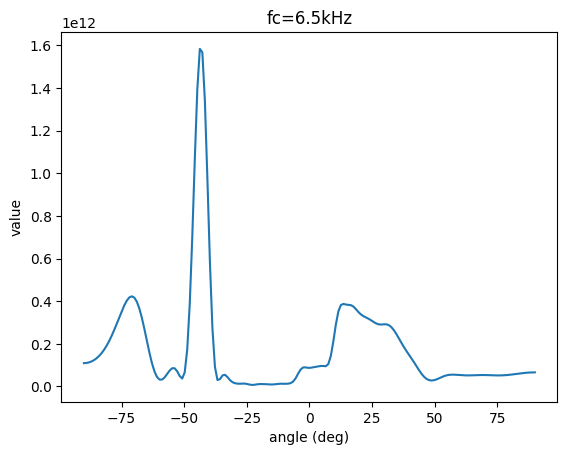

'\nplt.figure()\nplt.plot(My_ue_nobf.snr_list, mse_bf, \'x\')\nplt.axhline(y=0, color=\'r\', linestyle=\'-\')\n#plt.plot(My_ue.snr_list, mse_bf[:], \'x\')\nplt.legend ([\'MSE\']) #([\'MSE, No BF\', \'MSE, BF\'])\nplt.xlabel(\'SNR (dB)\')\nplt.ylabel(\'MSE (dB)\')\nplt.title(f\'fc={fc/1000:.1f}kHz\')\nplt.show()\n\n\nfig,ax = plt.subplots()\nax.scatter(np.real(symbolset_no_bf), np.imag(symbolset_no_bf), c=\'r\', marker=\'x\')\nax.scatter(np.real(symbolset_bf), np.imag(symbolset_bf), c=\'g\', marker=\'x\')\nax.scatter(np.real(true_sym), np.imag(true_sym), c=\'b\',marker=\'o\')\nax.legend([\'RX DL, no BF\', \'RX DL, BF\',\'16QAM Constellation Points\'])\nax.set_ylim(-4, 4)\nax.set_xlim(-4,4)\nax.set_title("Constellation Diagram for SNR=15dB")\nplt.show()\n'

In [1]:
from bf_multichannel_const import bf_multichannel_const
import numpy as np
import matplotlib.pyplot as plt
from downlink import downlink

fc = 6.5e3

My_bf = bf_multichannel_const(6.5e3, 2, 1, 1)
# rx at (0,0)
# tx_1 at (5,5) with a wall at x=10
# after relection, tx_2 at (15,5)
My_bf.reflection_list = np.array([1,0.5])
My_bf.x_tx_list = np.array([5,15])
My_bf.y_tx_list = np.array([5,5])

theta_bf, wk, S_theta = My_bf.simulation() #3*np.pi/4 #pos 45 degree angle?

My_ue_nobf = downlink(6.5e3, 1, 1, theta=theta_bf, wk=wk, apply_bf=False)
# do not assume independence
My_ue_nobf.reflection_list = np.array([1,0.5]) # this shouldn't play a part
#My_ue.x_tx_list = np.array([5,15]) #shouldn't need to touch gnb location
#My_ue.y_tx_list = np.array([5,5]) #shouldn't need to touch gnb location
#My_bf.reflection_list = np.array([1,0.5])
My_ue_nobf.x_rx_list = np.array([5,15])
My_ue_nobf.y_rx_list = np.array([5,5])
My_ue_nobf.simulation()
mse_no_bf = My_ue_nobf.mean_mse
symbolset_no_bf = My_ue_nobf.mean_symbols[-1,:]

true_sym = np.reshape(np.tile(np.arange(-3,4,2),4),(4,4)) + 1j*np.reshape(np.repeat(np.arange(3,-4,-2),4),(4,4))
My_ue = downlink(6.5e3, 1, 1, theta=theta_bf, wk=wk, apply_bf=True)
My_ue.x_rx_list = np.array([5,15])
My_ue.y_rx_list = np.array([5,5])
My_ue.simulation()
symbolset_bf = My_ue.mean_symbols[-1,:]
mse_bf =  My_ue.mean_mse
# equalizer taps
plt.figure()
plt.plot(np.linspace(-90,90,len(S_theta)), S_theta)
#plt.legend () #(['MSE, No BF', 'MSE, BF'])
plt.xlabel('angle (deg)')
plt.ylabel('value')
plt.title(f'fc={fc/1000:.1f}kHz')
plt.show()

"""
plt.figure()
plt.plot(My_ue_nobf.snr_list, mse_bf, 'x')
plt.axhline(y=0, color='r', linestyle='-')
#plt.plot(My_ue.snr_list, mse_bf[:], 'x')
plt.legend (['MSE']) #(['MSE, No BF', 'MSE, BF'])
plt.xlabel('SNR (dB)')
plt.ylabel('MSE (dB)')
plt.title(f'fc={fc/1000:.1f}kHz')
plt.show()


fig,ax = plt.subplots()
ax.scatter(np.real(symbolset_no_bf), np.imag(symbolset_no_bf), c='r', marker='x')
ax.scatter(np.real(symbolset_bf), np.imag(symbolset_bf), c='g', marker='x')
ax.scatter(np.real(true_sym), np.imag(true_sym), c='b',marker='o')
ax.legend(['RX DL, no BF', 'RX DL, BF','16QAM Constellation Points'])
ax.set_ylim(-4, 4)
ax.set_xlim(-4,4)
ax.set_title("Constellation Diagram for SNR=15dB")
plt.show()
"""